In [1]:
import numpy as np
import pandas as pd
import scipy
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import ComplementNB

% matplotlib inline

In [ ]:
# Formatting for bold prints in output
from IPython.display import Markdown, display
def printmd(string):
    display(Markdown(string))

In [2]:
data_path = 'sentiment labelled sentences/yelp_labelled.txt'

yelp_raw = pd.read_csv(data_path, delimiter='\t', header=None)
yelp_raw.columns = ['review', 'sentiment']

print(yelp_raw[yelp_raw['sentiment']==0].head(5))
print(yelp_raw.review.tail())

                                              review  sentiment
1                                 Crust is not good.          0
2          Not tasty and the texture was just nasty.          0
5     Now I am getting angry and I want my damn pho.          0
6              Honeslty it didn't taste THAT fresh.)          0
7  The potatoes were like rubber and you could te...          0
995    I think food should have flavor and texture an...
996                             Appetite instantly gone.
997    Overall I was not impressed and would not go b...
998    The whole experience was underwhelming, and I ...
999    Then, as if I hadn't wasted enough of my life ...
Name: review, dtype: object


In [3]:
pos_keywords = ['great', 'loved', 'love', 'awesome', 'amazing', 'fav',
               'excellent', 'good', 'enjoyed', 'best', 'yummy', 'pleasure', 'wow']

neg_keywords = ['not', 'angry', 'didn\'t', 'disgusted', 'slow', 'nasty', 
                'dirty', 'avoid', 'disappointed', 'never', 'disappointing', 
                'poor', 'bad', 'wasted']

for key in pos_keywords:
    yelp_raw[str(key)] = yelp_raw.review.str.contains(
        ' ' + str(key) + ' ', 
        case=False
    )

# Since these would be negatively correlated with positive sentiment, reverse the 
# boolean to keep True positively correlated
for key in neg_keywords:
    yelp_raw[str(key)] = ~yelp_raw.review.str.contains(
        ' ' + str(key) + ' ',
        case=False
    )
    
# Exclamation marks 
yelp_raw['exclamation'] = yelp_raw.review.str.contains('!')

In [4]:
#Thought maybe length of review would be related, but this didn't help
yelp_raw['long'] = yelp_raw.review.str.len()
yelp_raw['long'] = [0 if x < 80 else 1 for x in yelp_raw['long']]


In [5]:
# Ellipsis didn't correlate to sentiment
# yelp_raw['ellipsis'] = yelp_raw.review.str.contains('\.\.\.')


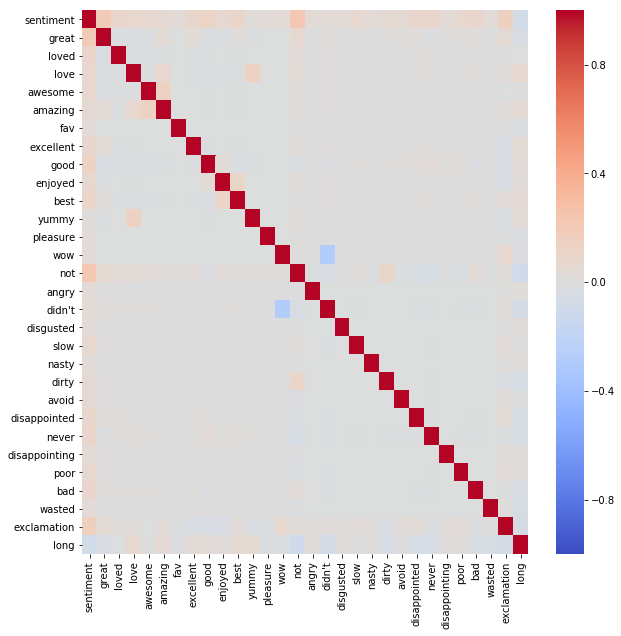

In [6]:
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(yelp_raw.corr(), vmax=1, vmin=-1, cmap='coolwarm', ax=ax)
plt.show()

In [15]:
# specifying variables and outcomes for SKLearn
data = yelp_raw[pos_keywords + neg_keywords + ['exclamation'] + ['long']]
target = yelp_raw['sentiment']

bnb = BernoulliNB()

bnb.fit(data, target)
y_pred = bnb.predict(data)

# Display our results
print('Number of mislabeled points out of a total {} points : {}'.format(
    data.shape[0], 
    (target != y_pred).sum()
))

Number of mislabeled points out of a total 1000 points : 331


In [8]:
# Specify another type of bayes filter - Gaussian
gnb = GaussianNB()
gnb.fit(data, target)

y_pred_g = gnb.predict(data)

# Display results
print('Number of mislabeled points out of a total {} points : {}'.format(
    data.shape[0],
    (target != y_pred_g).sum()
))

Number of mislabeled points out of a total 1000 points : 439


In [9]:
# Specify another type of bayes filter - Complement
cnb = ComplementNB()
cnb.fit(data, target)

y_pred_c = cnb.predict(data)

# Display results
print('Number of mislabeled points out of a total {} points : {}'.format(
    data.shape[0],
    (target != y_pred_c).sum()
))

Number of mislabeled points out of a total 1000 points : 347


## Using the same model with a different dataset

In [10]:
# Try with another data set 

data_path = 'sentiment labelled sentences/amazon_cells_labelled.txt'

amazon_raw = pd.read_csv(data_path, delimiter='\t', header=None)
amazon_raw.columns = ['review', 'sentiment']

In [11]:
for key in pos_keywords:
    amazon_raw[str(key)] = amazon_raw.review.str.contains(
        ' ' + str(key) + ' ', 
        case=False
    )

for key in neg_keywords:
    amazon_raw[str(key)] = ~amazon_raw.review.str.contains(
        ' ' + str(key) + ' ',
        case=False
    )
    
amazon_raw['exclamation'] = amazon_raw.review.str.contains('!')

amazon_raw['long'] = amazon_raw.review.str.len()
amazon_raw['long'] = [0 if x < 60 else 1 for x in amazon_raw['long']]

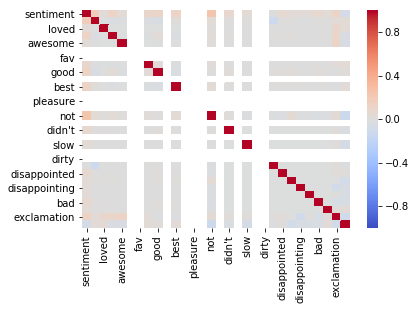

               sentiment     great     loved      love   awesome  amazing  \
sentiment       1.000000  0.173537  0.031639  0.127515  0.044766      NaN   
great           0.173537  1.000000 -0.005845 -0.023556 -0.008270      NaN   
loved           0.031639 -0.005845  1.000000 -0.004034 -0.001416      NaN   
love            0.127515 -0.023556 -0.004034  1.000000 -0.005708      NaN   
awesome         0.044766 -0.008270 -0.001416 -0.005708  1.000000      NaN   
amazing              NaN       NaN       NaN       NaN       NaN      NaN   
fav                  NaN       NaN       NaN       NaN       NaN      NaN   
excellent       0.089803 -0.016589 -0.002841 -0.011451 -0.004020      NaN   
good            0.119296 -0.042381 -0.007258  0.043881 -0.010270      NaN   
enjoyed              NaN       NaN       NaN       NaN       NaN      NaN   
best            0.123404  0.023257 -0.003904 -0.015736 -0.005524      NaN   
yummy                NaN       NaN       NaN       NaN       NaN      NaN   

In [12]:
sns.heatmap(amazon_raw.corr(), vmax=1, vmin=-1, cmap='coolwarm')
plt.show()

print(amazon_raw.corr())

In [13]:
# specifying variables and outcomes for SKLearn
data = amazon_raw[pos_keywords + neg_keywords + ['exclamation'] + ['long']]
target = amazon_raw['sentiment']

bnb = BernoulliNB()

bnb.fit(data, target)
y_pred = bnb.predict(data)

# Display our results
print('Number of mislabeled points out of a total {} points : {}'.format(
    data.shape[0], 
    (target != y_pred).sum()
))

Number of mislabeled points out of a total 1000 points : 379


Addding the long variable to this one made it worsed